In [1]:
from pylab import *
from healpy import *
from py_lognormal_mocks import *

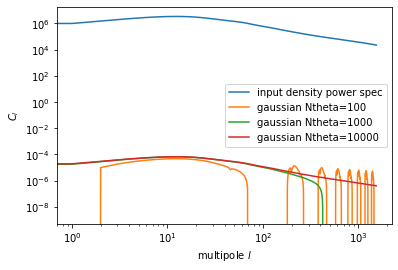

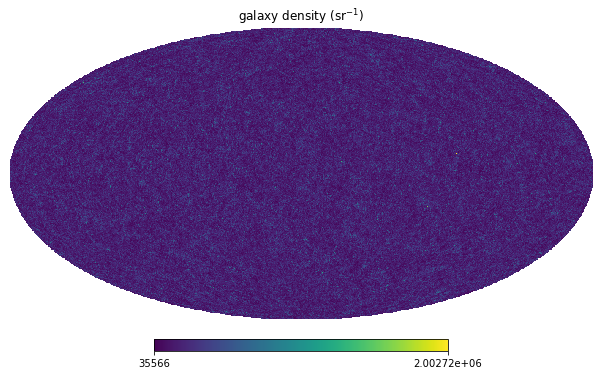

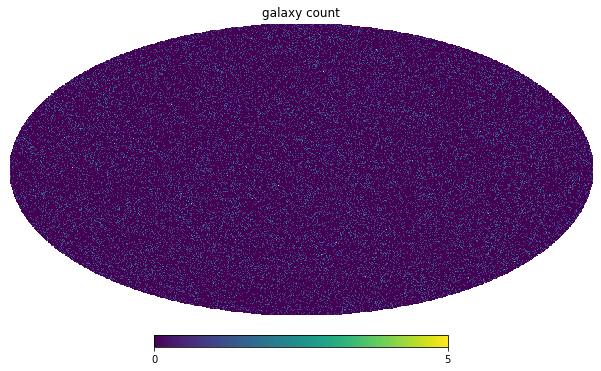

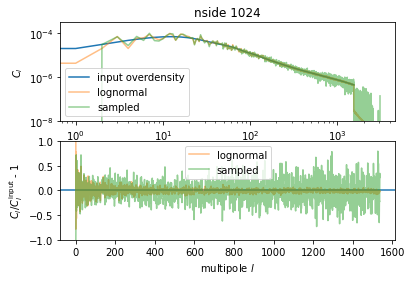

In [3]:
close('all')

ngal = 222828.6428782517 # sr^-1

clgg = loadtxt("../test/clgg_th_des_z1.dat") # This is the overdensity power spectrum

nside = 1024
npix = 12*nside**2
omegapix = 4*pi/npix

rhobar = array([ngal])  # mean of galaxy density field

Cl = array([[ ngal**2 * clgg ]],dtype='float64')  # This is the power spectrum of the galaxy density rhog

Ntheta = 10000
gaussbar100, Clgauss100 = lognormal_mocks_stats(rhobar,Cl,100)
gaussbar1000, Clgauss1000 = lognormal_mocks_stats(rhobar,Cl,1000)
gaussbar, Clgauss = lognormal_mocks_stats(rhobar,Cl,Ntheta)


figure()
plot(Cl[0,0],label='input density power spec')
plot(Clgauss100[0,0],label='gaussian Ntheta=100')
plot(Clgauss1000[0,0],label='gaussian Ntheta=1000')
plot(Clgauss[0,0],label='gaussian Ntheta=%d' % Ntheta)
loglog()
legend()
ylabel(r"$C_l$")
xlabel(r"multipole $l$")


mgauss = synfast(Clgauss[0,0],nside)

rhog = exp(gaussbar[0] + mgauss) # This is the galaxy density map

Clrhog = anafast(rhog)

mollview(rhog,title=r"galaxy density (sr$^{-1}$)")

countg = poisson(rhog * omegapix) # This is the sample galaxy counts for each pixel

mollview(countg,title="galaxy count")

deltag = countg/omegapix / ngal - 1   # This is the sampled galaxy overdensity

Cldeltag = anafast(deltag) - 1/ngal  # This is the power spectrum of the sampled overdensity field, corrected for shot noise

figure()
subplot(211)
plot(clgg,label='input overdensity',color='C0')
plot(Clrhog/ngal**2,label='lognormal',color='C1',alpha=0.5)
plot(Cldeltag,label='sampled',color='C2',alpha=0.5)
loglog()
legend()
ylim(1e-8,3e-4)
ylabel(r"$C_l$")
xlabel(r"multipole $l$")
title("nside %d" % nside)

subplot(212)
s = slice(0,min(len(Clrhog), len(clgg)))
axhline(0.0,color='C0')
plot(Clrhog[s]/ngal**2/clgg[s]-1,label='lognormal',alpha=0.5,color='C1')
plot(Cldeltag[s]/clgg[s]-1,label='sampled',alpha=0.5,color='C2')
ylim(-1,1)
legend()
ylabel(r"$C_l/C_l^{\rm input}$ - 1")
xlabel(r"multipole $l$")
savefig("clgg_comparison_nside%d.png" % nside)

show()
